## Object Detection with OpenCV and SSD Tensorflow model

In this notebook we will demonstrate object detection with OpenCV and a simple SSD model called mobilenet

In [1]:
import numpy as np
import cv2 as cv2
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Routine to fix colors in image
def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In this section we will read the labels. We will also create a COLORS array which will give a different color for each label. Note coco has 90 labels by default.

In [2]:
#Declare Labels
LABELS = ["background", "person", "bicycle", "car", "motorcycle",
    "airplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant",
    "unknown", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse",
    "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "unknown", "backpack",
    "umbrella", "unknown", "unknown", "handbag", "tie", "suitcase", "frisbee", "skis",
    "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard",
    "surfboard", "tennis racket", "bottle", "unknown", "wine glass", "cup", "fork", "knife",
    "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog",
    "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "unknown", "dining table",
    "unknown", "unknown", "toilet", "unknown", "tv", "laptop", "mouse", "remote", "keyboard",
    "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "unknown",
"book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush" ]

print ("number of labels", len(LABELS))
np.random.seed(42) #Set seed so that we get the same results everytime
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
	dtype="uint8")

number of labels 91


The DNN module from CV2 supports reading of tensorflow trained object detection models. We need to load the weight and config for this. For more on this topic refer to 
https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API

In [3]:
weights="model_data/ssd_inception_v2_coco_2017_11_17_frozen_inference_graph.pb"
config="model_data/ssd_inception_v2_coco_2017_11_17.pbtxt"

#weights="model_data/ssd_mobilenet_v1_coco_2017_11_17_frozen_inference_graph.pb"
#config="model_data/ssd_mobilenet_v1_coco_2017_11_17.pbtxt"

In [4]:
#Read the model and create a Net internally with the model
net = cv2.dnn.readNetFromTensorflow(weights, config)

We will now read the file and process it. 

In [5]:
img = cv2.imread('images/dining_table.jpg')

In [6]:
#convert the image to a blob for processing. swap RB enable the issue with CV2 reading files as BGR
blob = cv2.dnn.blobFromImage(img, swapRB=True, crop=False)

In [7]:
#Set the input
net.setInput(blob)

In [8]:
#Process it to create boxes. 
boxes = net.forward()

There will be 100 detections. The detection will include the classID, confidence and parameters of the box

In [9]:
print (boxes.shape)

(1, 1, 100, 7)


In [10]:
for i in range(0, boxes.shape[2]):
    classID = int(boxes[0, 0, i, 1]) #ClassID
    confidence = boxes[0, 0, i, 2]  #Confidence
    #print ("Confidence", confidence)
    if confidence > 0.7: #Set a threshold beyond which you want detections
        print (classID)
        (H, W) = img.shape[:2]  
        print (boxes[0, 0, i, 3:7])
        #Box coordinates are normalised. Multiply with actual rows and columns to get
        #actual dimensions
        box = boxes[0, 0, i, 3:7] * np.array([W, H, W, H]) 
        #Integer the coordinates
        (startX, startY, endX, endY) = box.astype("int")
        #Integer the colors
        color = COLORS[classID]
        color = [int(c) for c in color]
        print (LABELS[classID], color)
        #Make rectangle for the box
        cv2.rectangle(img, (startX, startY), (endX, endY), color, 2)
        #Text to display includes the Label and confidence
        text = "{}: {:.4f}".format(LABELS[classID], confidence)
        cv2.putText(img, text, (startX, startY - 5),
				cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

46
[0.28656584 0.28992367 0.5242221  0.8608507 ]
wine glass [86, 134, 252]
86
[0.69321704 0.5572024  0.8499565  0.8569314 ]
vase [16, 17, 85]


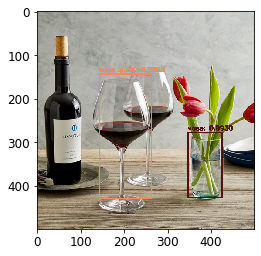

In [11]:
plt.imshow(fixColor(img))